In [29]:
# 1. Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# 2. Load dataset
df=pd.read_csv("/Users/bora/Desktop/Telco Churn_EDA/Telco_Churn_Data.csv")
print(df.columns.to_list())

['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [30]:
# 1. Drop the customerID column as it is a unique identifier and not useful for prediction
df.drop("CustomerID", axis=1, inplace=True)

# 2. Convert TotalCharges to numeric
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"], errors="coerce")

# 3. Handle missing values in 'TotalCharges' with the column's median value
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())   

# 4. Convert the targer variable 'Churn' from 'Yes/No' to binary 1/0
df["Churn"]= df["Churn"].map({"Yes":1,"No":0})

# 5. Label encode all binary categorical columns (columns with only two unique values)
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
binary_cols=[col for col in df.columns if df[col].nunique()==2 and df[col].dtype=="object"]
for col in binary_cols:
    df[col]=le.fit_transform(df[col])

# 6. One-hot encode remaining non-binary categorical variables
df=pd.get_dummies(df, drop_first=True)

# 7. Display the final shape of the dataset and a few column names to confirm transformation
print("Final shape:", df.shape)
print("Sample columns:", df.columns.tolist()[:10], "...")

Final shape: (7042, 31)
Sample columns: ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn'] ...


In [31]:
# Define X (features) and y (target)
X=df.drop("Churn",axis=1)
y=df["Churn"]

# 2. Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

# 3. Build logistic regression model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# 4. Train logistic regression model
model=LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)

# 5. Make predictions
y_pred=model.predict(X_test)

# 6. Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))




Accuracy: 0.8055358410220014
Confusion Matrix:
 [[927 118]
 [156 208]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      1045
           1       0.64      0.57      0.60       364

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



/var/folders/2b/l081x7654zn1bvyhb1nt2lww0000gn/T/ipykernel_53495/200002223.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, x="Coefficient", y="Feature", palette="coolwarm")


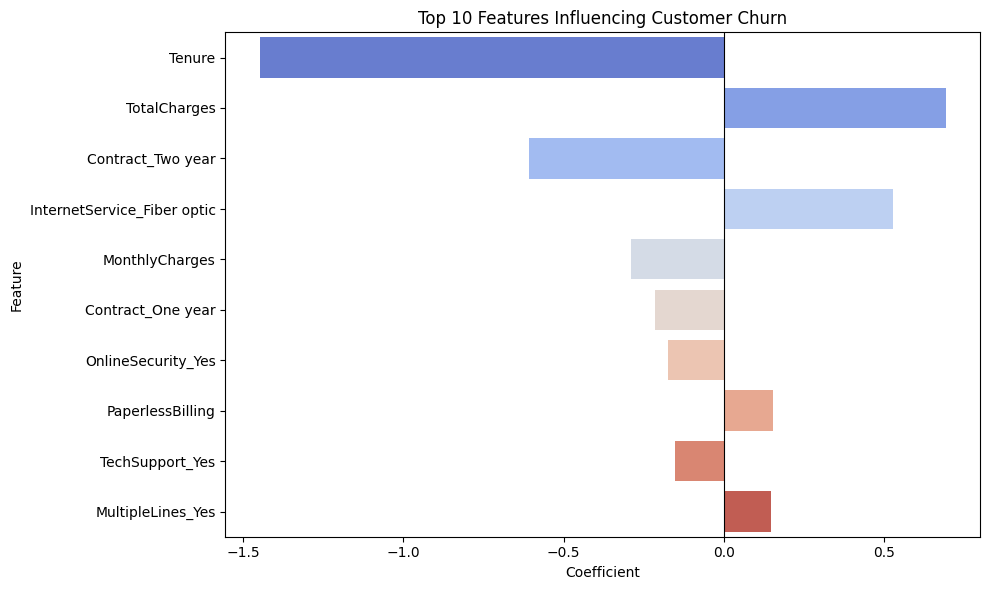

In [32]:
# Step 1: Get feature names and model coefficients
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
})

# Step 2: Sort features by absolute coefficient value
feature_importance["abs_coef"] = feature_importance["Coefficient"].abs()
top_features = feature_importance.sort_values(by="abs_coef", ascending=False).head(10)

# Step 3: Feature Importance Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_features, x="Coefficient", y="Feature", palette="coolwarm")
plt.title("Top 10 Features Influencing Customer Churn")
plt.axvline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()

